In [26]:
import warnings
warnings.filterwarnings("ignore")

In [205]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from textblob import TextBlob, Word
import seaborn as sns

In [19]:
raw_df = pd.read_csv('tripadvisor_hotel_reviews.csv')
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


## Test Train Split

In [20]:
train_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42, stratify=raw_df['Rating'])

## Data Analysis

In [21]:
df = train_df
len(df['Review'])

16392

In [27]:
df['word_count'] = df['Review'].apply(lambda x: len(x.split()))

In [31]:
df['char_count'] = df['Review'].apply(lambda x: len(x))

In [33]:
def average_word_len(x):
    words = x.split()
    return sum(len(word) for word in words)/len(words)

In [35]:
df['average_word_length'] = df['Review'].apply(lambda x: average_word_len(x))

In [36]:
df.head()

,Review,Rating,word_count,char_count,average_word_length
18017,excellent hotel great location stayed casa cam...,5,81,554,5.827160
325,heavenly bed scam overall nice hotel excellent...,4,113,767,5.778761
19390,excellent choice room mate alicia modern small...,5,54,389,6.185185
5886,"probably new yorks finest 4 star hotel, just r...",5,235,1555,5.612766
17248,stick sandals visited bahia principe punta can...,2,96,678,6.052083


In [ ]:
from nltk.corpus import stopwords

In [40]:
stop_words = stopwords.words("english")
len(stop_words)

179

In [56]:
df['Review'][18017]

'excellent hotel great location stayed casa camper march 2007 3 night visit barcelona, chose hotel mainly based reviews tripadvisor agree certainly lived glowing reports received.it modern hotel comfortable, bedrooms nice modern large shower area nice, 2 room idea great lovely room bedroom relax long day walking city, nice able throw open balcony doors relax coffee listening sounds coming street getting ready dinner, loved fact day snacks included room rate.it great location just la ramblas, certainly recommend casa camper planning stay barcelona,  '

In [63]:
df['stopword_count'] = df['Review'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))

In [66]:
df['stopword_rate'] = df['stopword_count']/df['word_count']

In [68]:
df.sort_values(by='stopword_rate')

,Review,Rating,word_count,char_count,average_word_length,stopword_count,stopword_rate
4487,"fine stayed 3 days october, nice hotel nothing...",3,34,226,5.617647,0,0.000000
305,water near pike market great hotel wonderful l...,5,18,128,6.055556,0,0.000000
11365,seduction water beach club flew boston long we...,5,43,302,6.000000,0,0.000000
8257,good hotel family hotel location convenience t...,4,38,257,5.736842,0,0.000000
7482,"loved le richelieu, stayed 2 nights 12/5 12/7 ...",5,31,208,5.677419,0,0.000000
...,...,...,...,...,...,...,...
6318,dump travel agent thought doing favour up-grad...,1,36,238,5.583333,7,0.194444
14279,just nice not informed fact carry luggage 5 mi...,1,23,159,5.869565,5,0.217391
12833,"ok not room, nicolaas witsen not bad kind mode...",3,41,251,5.097561,9,0.219512
1916,not worth it.. definitly not worth issues park...,2,45,294,5.511111,10,0.222222


## Data Cleaning

In [70]:
df['lowercase'] = df['Review'].apply(lambda x : " ".join(word.lower() for word in x.split()))

In [72]:
df['Review'][5886]

"probably new yorks finest 4 star hotel, just returned anniversary.like booked hotel reading web comments, want 5 star hotel want pay 5 star prices, want excellent 4star superb position want pay reasonable price it.we executive king room read suite large beautifully furnished great marble bathroom dressing area separate sitting room 2 tv stereo really comfy bedroom nice toiletries candles towels changed twice day bed linen 2 days quiet airy, evening turn service flowers evian mini bar, view room 14th floor n't interesting hotel offered change night 3 7 end n't bothered, room decor beige white light fittings seen room, restful.it great base return exhausting enjoyable 7 night 8 day time trip new york, concierge helpful doorman fantastic getting cabs, staff courteous friendly, room ready arrived 2-30pm late 4-00pm no extra charge checkout, did n't eat drink hotel pre booked great restaurants london, red flame breakfast food court grand central terminal ca n't big cooked breakfast day riv

In [91]:
df['punctuation'] = df['lowercase'].str.replace('[^a-zA-Z\s]', " ").str.replace('\s+'," ")

In [ ]:
import string
alphs = list(string.ascii_letters)
stop_words = stop_words+alphs
stop_words.remove('not')

In [100]:
df['stopwords'] = df['punctuation'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [119]:
pd.Series(" ".join(df['stopwords']).split()).value_counts()[:10]

hotel       39755
room        28116
not         25300
great       17106
good        13811
staff       13287
stay        12301
nice        10027
rooms        9945
location     9157
dtype: int64

## Lemmatize

In [193]:
from textblob import Word, TextBlob

In [ ]:
df['stopwords'][18017]

18017    excellent hotel great location stayed casa cam...
325      heavenly bed scam overall nice hotel excellent...
19390    excellent choice room mate alicia modern small...
5886     probably new yorks finest star hotel returned ...
17248    stick sandals visited bahia principe punta can...
                               ...                        
5659     cristal palace central quiet travelling new ze...
10375    quaint cute getaway middle firenze great hotel...
11192    not okay sooo vacation couple boyfriend latino...
10159    good experience spending recent trip paris bus...
3323     okay room great beach chose caribe hilton hote...
Name: stopwords, Length: 16392, dtype: object

In [125]:
toy = df['stopwords'].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))

In [127]:
toy[18017]

'excellent hotel great location stayed casa camper march night visit barcelona chose hotel mainly based review tripadvisor agree certainly lived glowing report received modern hotel comfortable bedroom nice modern large shower area nice room idea great lovely room bedroom relax long day walking city nice able throw open balcony door relax coffee listening sound coming street getting ready dinner loved fact day snack included room rate great location la ramblas certainly recommend casa camper planning stay barcelona'

In [128]:
df['stopwords'][18017]

'excellent hotel great location stayed casa camper march night visit barcelona chose hotel mainly based reviews tripadvisor agree certainly lived glowing reports received modern hotel comfortable bedrooms nice modern large shower area nice room idea great lovely room bedroom relax long day walking city nice able throw open balcony doors relax coffee listening sounds coming street getting ready dinner loved fact day snacks included room rate great location la ramblas certainly recommend casa camper planning stay barcelona'

In [147]:
#Word('we are planning going included certainly').lemmatize('v')
# myBlob3=TextBlob('we are planning going included certainly')
# for word in myBlob3.words:
#     print(word, word.lemmatize("v"))

df['lemmatize'] = df['stopwords'].apply(lambda x: " ".join(word.lemmatize("v") for word in TextBlob(x).words))

In [150]:
df.columns

Index(['Review', 'Rating', 'word_count', 'char_count', 'average_word_length',
       'stopword_count', 'stopword_rate', 'lowercase', 'punctuation',
       'stopwords', 'lemmatize'],
      dtype='object')

In [154]:
df.drop(columns=['lowercase', 'punctuation', 'stopwords'], inplace=True)

In [158]:
df.rename(columns={'lemmatize':'Review_Final'}, inplace=True)

In [159]:
df.head()

,Review,Rating,word_count,char_count,average_word_length,stopword_count,stopword_rate,Review_Final
18017,excellent hotel great location stayed casa cam...,5,81,554,5.827160,1,0.012346,excellent hotel great location stay casa campe...
325,heavenly bed scam overall nice hotel excellent...,4,113,767,5.778761,6,0.053097,heavenly bed scam overall nice hotel excellent...
19390,excellent choice room mate alicia modern small...,5,54,389,6.185185,0,0.000000,excellent choice room mate alicia modern small...
5886,"probably new yorks finest 4 star hotel, just r...",5,235,1555,5.612766,6,0.025532,probably new yorks finest star hotel return an...
17248,stick sandals visited bahia principe punta can...,2,96,678,6.052083,3,0.031250,stick sandals visit bahia principe punta cana ...


In [176]:
TextBlob(df['Review_Final'][18017]).sentiment

Sentiment(polarity=0.3721397649969079, subjectivity=0.6630952380952382)

In [177]:
df['polarity'] = df['Review_Final'].apply(lambda x: list(TextBlob(x).sentiment)[0])
df['subjectivity'] = df['Review_Final'].apply(lambda x: list(TextBlob(x).sentiment)[1])

In [ ]:
df.rename(columns={'Review_Final':'Review_Preprocessed'})


,Review,Rating,word_count,char_count,average_word_length,stopword_count,stopword_rate,Review_Preprocessed,polarity,subjectivity
18017,excellent hotel great location stayed casa cam...,5,81,554,5.827160,1,0.012346,excellent hotel great location stay casa campe...,0.372140,0.663095
325,heavenly bed scam overall nice hotel excellent...,4,113,767,5.778761,6,0.053097,heavenly bed scam overall nice hotel excellent...,0.221053,0.554049
19390,excellent choice room mate alicia modern small...,5,54,389,6.185185,0,0.000000,excellent choice room mate alicia modern small...,0.253750,0.477500
5886,"probably new yorks finest 4 star hotel, just r...",5,235,1555,5.612766,6,0.025532,probably new yorks finest star hotel return an...,0.302309,0.591253
17248,stick sandals visited bahia principe punta can...,2,96,678,6.052083,3,0.031250,stick sandals visit bahia principe punta cana ...,-0.172222,0.457407
...,...,...,...,...,...,...,...,...,...,...
5659,cristal palace central quiet travelling new ze...,4,34,258,6.558824,1,0.029412,cristal palace central quiet travel new zealan...,0.278114,0.535690
10375,quaint cute getaway middle firenze great hotel...,4,16,116,6.187500,0,0.000000,quaint cute getaway middle firenze great hotel...,0.527778,0.725000
11192,"not, okay sooo vacation couple, just, boyfrien...",2,168,1119,5.654762,10,0.059524,not okay sooo vacation couple boyfriend latino...,0.072631,0.524265
10159,good experience spending recent trip paris bus...,3,151,1103,6.298013,4,0.026490,good experience spend recent trip paris busine...,0.015931,0.458824


In [190]:
columns = ['Review', 'Review_Final', 'word_count', 'char_count', 
           'stopword_count', 'average_word_length', 'stopword_rate', 'Rating',  'polarity', 'subjectivity']
df = df[columns]

In [192]:
df.sort_values(by='polarity', ascending=False).head()

,Review,Review_Final,word_count,char_count,stopword_count,average_word_length,stopword_rate,Rating,polarity,subjectivity
14932,"excellent excellent excellent.., stayed nights...",excellent excellent excellent stay nights star...,13,116,0,7.846154,0.0,5,1.00,1.000000
12953,"cant fault, excellent time n't fault staff exc...",cant fault excellent time fault staff excellen...,14,100,0,6.071429,0.0,5,1.00,1.000000
10572,perfect location service stayed hotel la perle...,perfect location service stay hotel la perle t...,19,135,0,6.052632,0.0,5,1.00,1.000000
17309,"h10 excellent stayed h10 catalunya july, perfe...",excellent stay catalunya july perfect universi...,20,145,0,6.200000,0.0,5,1.00,1.000000
7964,best business hotel sf stayed times business 2...,best business hotel sf stay time business down...,27,199,0,6.333333,0.0,5,0.95,0.533333


In [194]:
df.describe()

,word_count,char_count,stopword_count,average_word_length,stopword_rate,Rating,polarity,subjectivity
count,16392.000000,16392.000000,16392.000000,16392.000000,16392.000000,16392.000000,16392.000000,16392.000000
mean,103.783065,720.899524,3.563568,5.999445,0.031244,3.952233,0.279991,0.588275
std,101.187353,692.332347,4.733517,0.441412,0.026050,1.233063,0.176423,0.100755
min,8.000000,44.000000,0.000000,4.038462,0.000000,1.000000,-1.000000,0.000000
25%,48.000000,337.750000,1.000000,5.705882,0.012346,3.000000,0.183258,0.524205
50%,76.000000,532.000000,2.000000,5.976744,0.028169,4.000000,0.285172,0.583333
75%,123.000000,853.000000,5.000000,6.263158,0.045455,5.000000,0.384758,0.648268
max,1931.000000,13501.000000,85.000000,8.461538,0.245283,5.000000,1.000000,1.000000


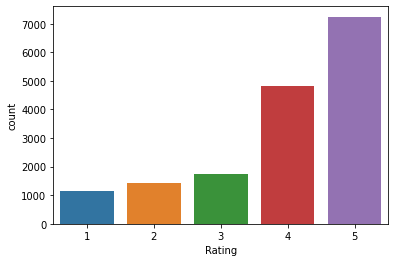

In [ ]:
sns.countplot(df['Rating'])
plt.show()

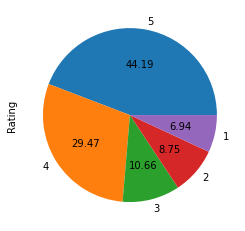

In [208]:
df['Rating'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

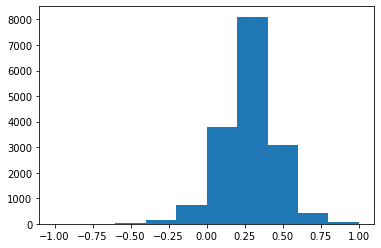

In [210]:
plt.hist(df['polarity'], bins=10)
plt.show()

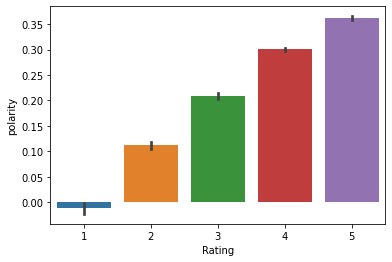

In [211]:
sns.barplot(x = df['Rating'], y = df['polarity'])
plt.show()

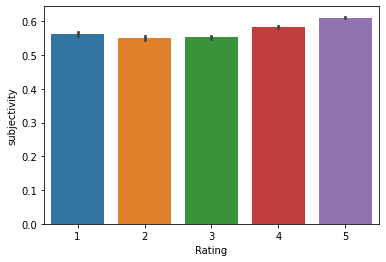

In [212]:
sns.barplot(x = df['Rating'], y = df['subjectivity'])
plt.show()

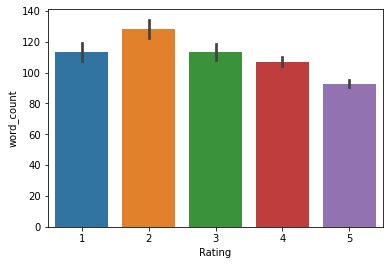

In [213]:
sns.barplot(x = df['Rating'], y = df['word_count'])
plt.show()

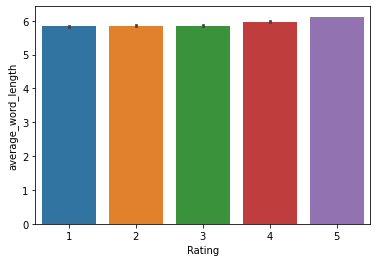

In [214]:
sns.barplot(x = df['Rating'], y = df['average_word_length'])
plt.show()

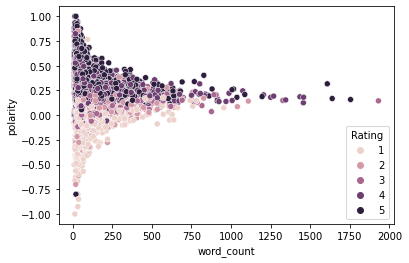

In [215]:
sns.scatterplot(df["word_count"], df["polarity"], hue=df["Rating"])
plt.show()

<Figure size 936x1224 with 0 Axes>

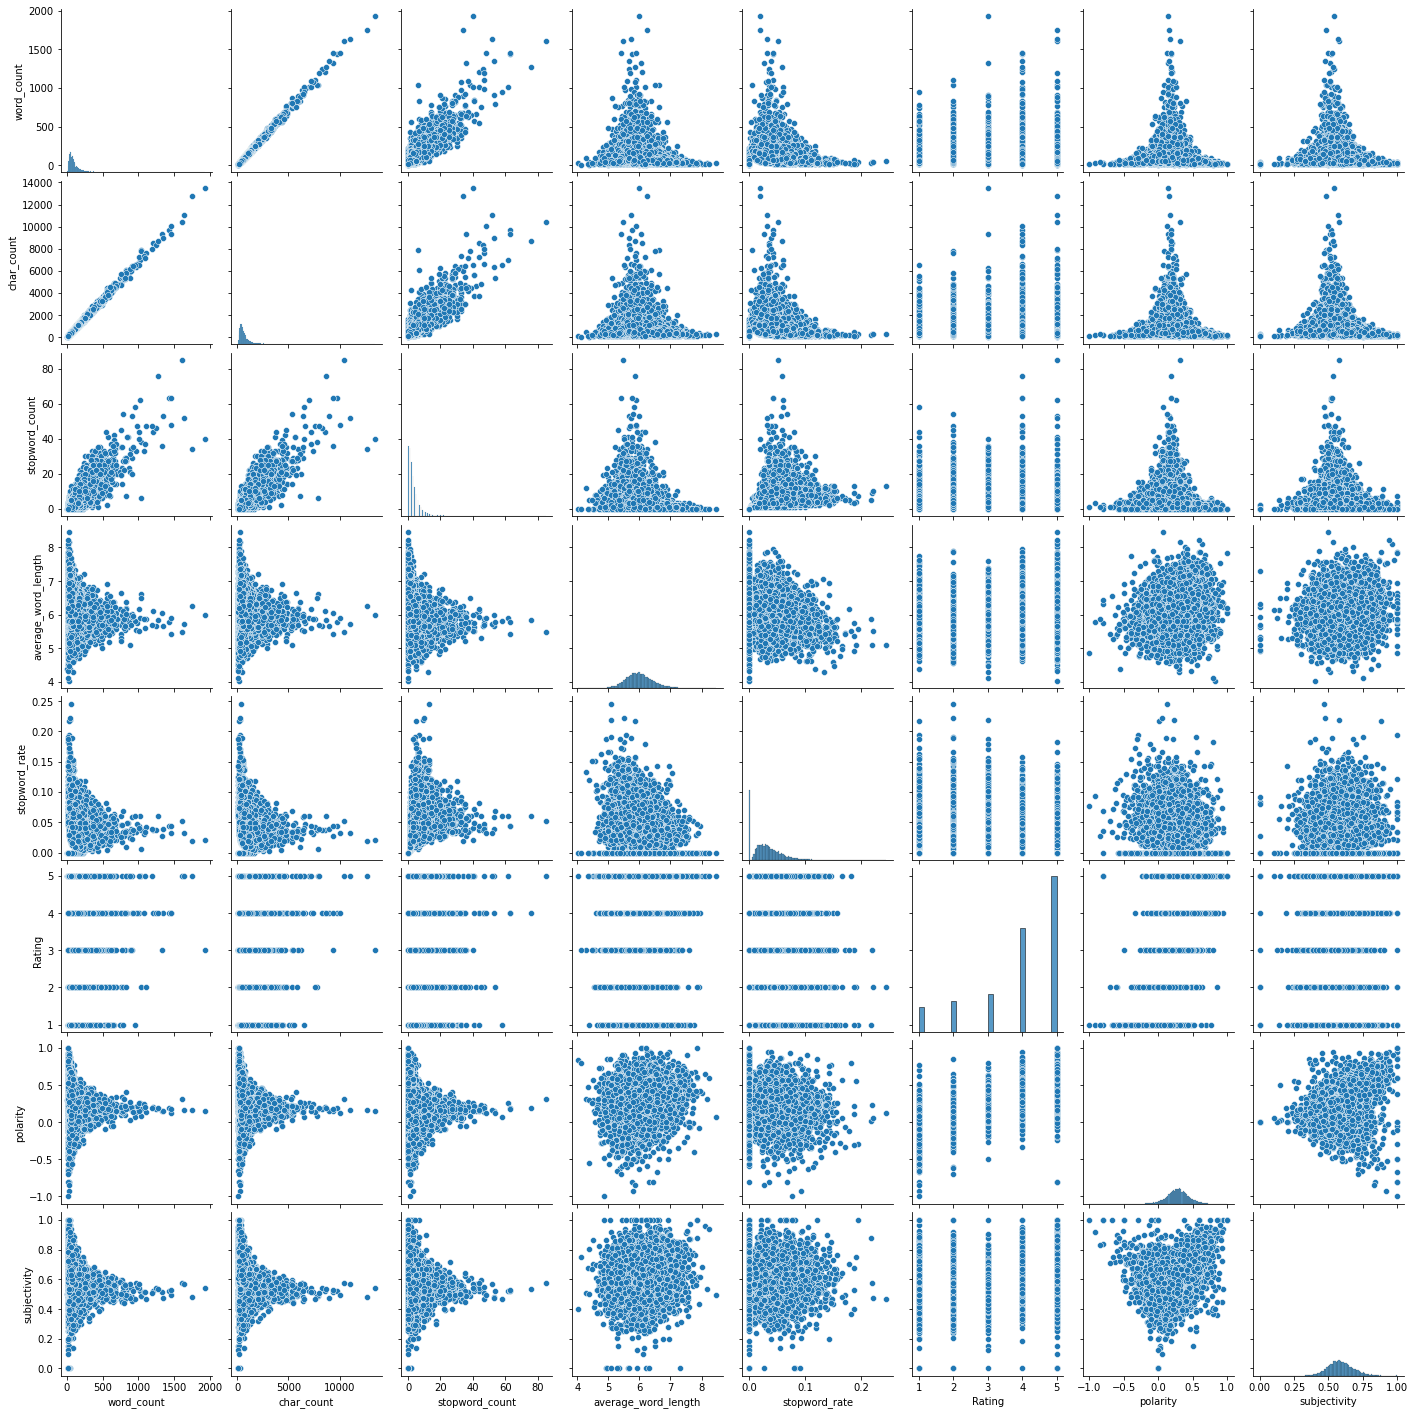

In [206]:
plt.figure(figsize=(13,17))
sns.pairplot(data=df.drop(['Review','Review_Final'],axis=1))
plt.show()